In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

from preprocessors.average_blur import layered_average_blur
from preprocessors.bilateral_filter import bilateral_filter
from preprocessors.gaussian_blur import gaussian_blur
from preprocessors.noise_reduction import denoise_image
from preprocessors.isolate_intensity import isolate_intensity

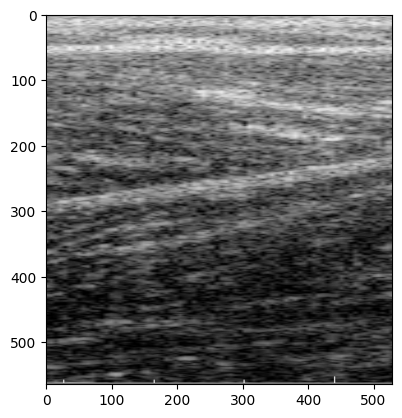

In [6]:
# frame_num = frames[2]
frame_num = 450
frame = im[:, :, frame_num]

plt.imshow(frame, cmap='gray')

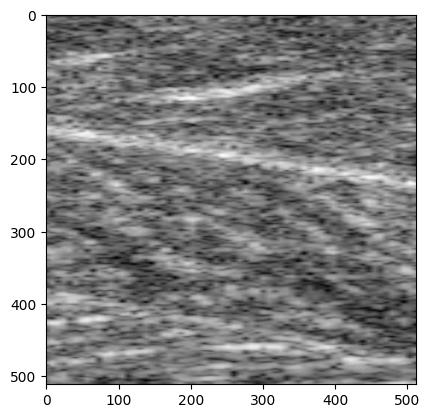

In [6]:
def load_image(file_path):
    return np.asarray(cv2.imread(file_path, cv2.IMREAD_GRAYSCALE))

image_path =  'YOUR IMAGE PATH'

image = load_image(image_path)
plt.imshow(image, cmap='gray')
plt.show()

In [4]:
def layered_max_blur(im):
    steps = [5, 3]
    for step in steps:
        temp = np.zeros((im.shape[0] // step, im.shape[1] // step))
        for i in range(temp.shape[0]):
            for j in range(temp.shape[1]):
                temp[i, j] = np.max(im[i*step:(i+1)*step, j*step:(j+1)*step])
        im = temp.copy()

    return im

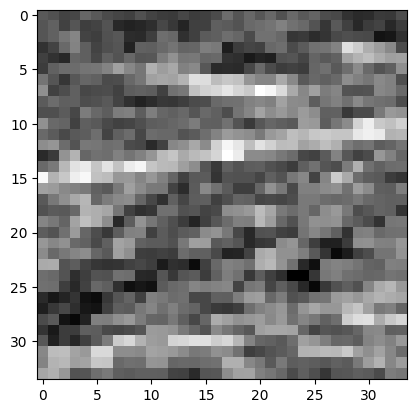

In [8]:
max_blur = layered_max_blur(cv2.flip(image, 1))
plt.imshow(max_blur, cmap='gray')

(-0.5, 528.5, 564.5, -0.5)

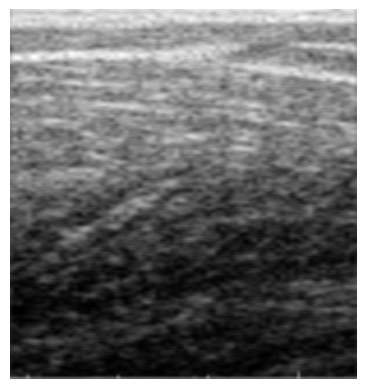

In [129]:
from preprocessors.noise_reduction import denoise_image

frame_denoise = denoise_image(frame)
plt.imshow(frame_denoise, cmap='gray')
plt.axis('off')


(-0.5, 34.5, 36.5, -0.5)

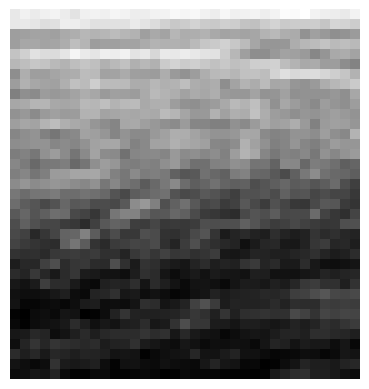

In [130]:
from preprocessors.average_blur import layered_average_blur

frame_LAP = layered_average_blur(frame_denoise)
plt.imshow(frame_LAP, cmap='gray')
plt.axis('off')

(-0.5, 33.5, 33.5, -0.5)

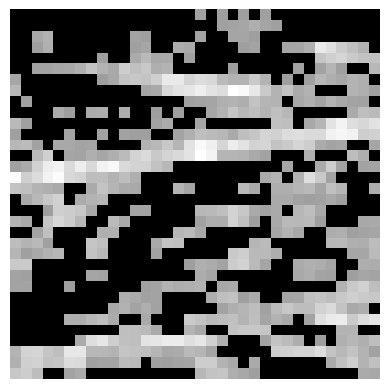

In [10]:
isolated_lap = isolate_intensity(max_blur, 'q1')
plt.imshow(isolated_lap, cmap='gray')
plt.axis('off')

(-0.5, 528.5, 564.5, -0.5)

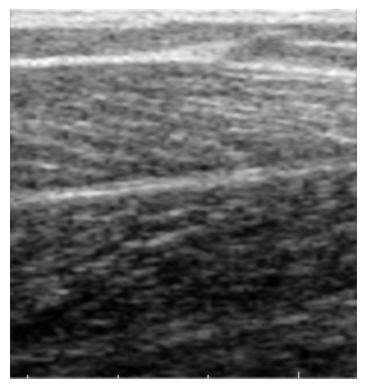

In [103]:
frame_bilateral = bilateral_filter(frame)
plt.imshow(frame_bilateral, cmap='gray')
plt.axis('off')

(-0.5, 528.5, 564.5, -0.5)

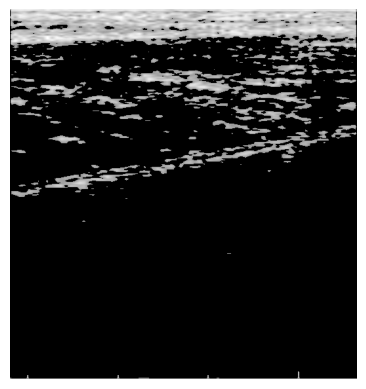

In [ ]:
from preprocessors.isolate_intensity import isolate_intensity

frame_gaussian = isolate_intensity(frame_gaussian, method='q1')

plt.imshow(frame_gaussian, cmap='gray')
plt.axis('off')

In [ ]:
_, frame_binary = cv2.threshold(frame, 118, 255, cv2.THRESH_BINARY)
plt.imshow(frame_binary, cmap='gray')

(-0.5, 528.5, 564.5, -0.5)

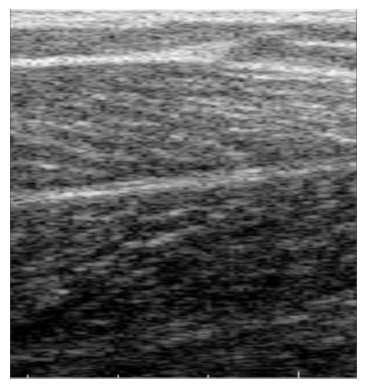

In [104]:
frame_gaussian = gaussian_blur(frame)

plt.imshow(frame_gaussian, cmap='gray')
# No axis
plt.axis('off')


In [ ]:
def binary_threshold(im, method=None):
    row_interval = im.shape[1]//7
    top_rows = np.argsort(np.mean(im, axis=1))[-row_interval:]
    median_row = int(np.median(top_rows))
    
    threshold = 100
    if method == 'q1':
        q1 = np.percentile(im[top_rows, :], 25)
        threshold = q1
    elif method == 'avg_min_intensity':
        min_intensities = [np.min(im[int(row)]) for row in top_rows[:median_row]]
        avg_min_intensity = np.mean(min_intensities)
        threshold = avg_min_intensity
        
    _, im_binary = cv2.threshold(im, threshold, 255, cv2.THRESH_BINARY)
    return im_binary

(-0.5, 528.5, 564.5, -0.5)

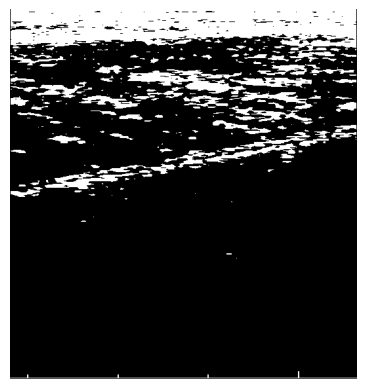

In [ ]:
frame_binary = binary_threshold(frame, method='q1')
plt.imshow(frame_binary, cmap='gray')
plt.axis('off')

In [ ]:
im = frame_gaussian.copy()
row_interval = im.shape[1]//5
top_rows = np.argsort(np.mean(im, axis=1))[-row_interval:]
median_row = int(np.median(top_rows))

threshold = 100
aponeuroses = im.copy()
method = 'q1'
if method == 'q1':
    # Find the q1 of the top 5 rows
    q1 = np.percentile(im[top_rows, :], 25)
    threshold = q1
elif method == 'avg_min_intensity':
    min_intensities = [np.min(im[int(row)]) for row in top_rows[:median_row]]
    avg_min_intensity = np.mean(min_intensities)
    threshold = avg_min_intensity

threshold

98.0

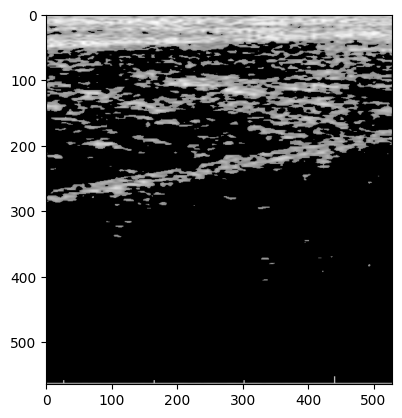

In [ ]:
test = frame_gaussian.copy()
test[test < threshold] = 0
plt.imshow(test, cmap='gray')

In [ ]:
frame_bilateral[frame_bilateral < 101] = 0

In [105]:
frame_gaussian = isolate_intensity(frame_gaussian, method='q1')

(-0.5, 33.5, 33.5, -0.5)

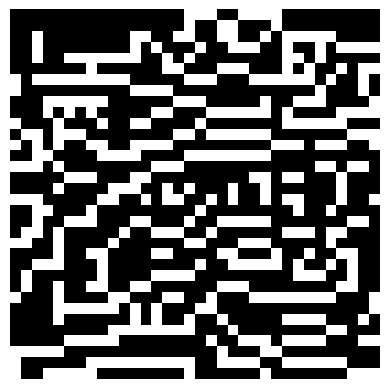

In [11]:
edges = cv2.Canny(isolated_lap.astype('uint8'), 50, 150)

plt.imshow(edges, cmap='gray')
plt.axis('off')

In [13]:
min_line_length = edges.shape[1]//3
max_line_gap = edges.shape[1]//5
min_line_length, max_line_gap

(11, 6)

In [14]:
lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=10, minLineLength=min_line_length, maxLineGap=max_line_gap)
lines

array([[[ 3, 33, 33,  3]],

       [[18, 17, 32, 14]],

       [[ 0, 14, 32,  3]],

       [[ 0, 32, 30, 32]],

       [[ 0, 21, 23, 15]],

       [[ 0,  6, 24,  0]],

       [[16, 21, 33, 17]],

       [[19, 28, 33, 27]],

       [[ 3,  8, 33,  9]],

       [[ 2, 31, 32, 19]],

       [[ 2,  2, 30, 29]],

       [[ 3,  6, 29,  2]],

       [[ 0, 33, 29, 21]],

       [[ 2, 11,  6, 33]],

       [[ 2, 20, 16, 13]],

       [[ 0, 31, 17, 18]],

       [[ 0, 10, 28,  3]],

       [[ 0, 26, 33,  5]],

       [[ 0, 12, 14, 12]],

       [[12, 17, 29,  6]],

       [[16, 28, 31, 25]],

       [[ 2,  3, 17, 10]],

       [[ 1, 24, 16, 24]]], dtype=int32)

(-0.5, 33.5, 33.5, -0.5)

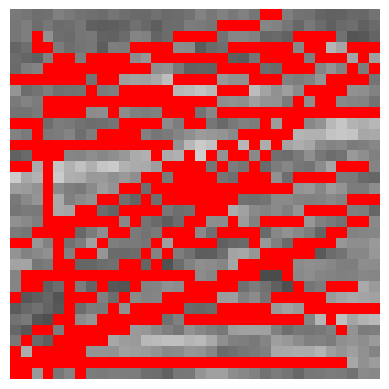

In [16]:
# lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=50, minLineLength=500, maxLineGap=100)

# Draw the lines on a copy of the original image
aponeuroses = max_blur.copy().astype('uint8')
# Convert to 3 channels
aponeuroses = cv2.cvtColor(aponeuroses, cv2.COLOR_GRAY2BGR)
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(aponeuroses, (x1, y1), (x2, y2), (255, 0, 0), 1)

plt.imshow(aponeuroses, cmap='gray')
plt.axis('off')

In [17]:
def filter_lines_by_angle(lines, angle_min, angle_max):
    filtered_lines = []
    for line in lines:
        for x1, y1, x2, y2 in line:
            angle = math.atan2(y2 - y1, x2 - x1) * 180.0 / np.pi
            if angle_min <= angle <= angle_max:
                filtered_lines.append(line)
    return filtered_lines

In [52]:
filtered_lines = filter_lines_by_angle(lines, -30, -1)
filtered_lines = filter_lines_by_angle(filtered_lines, -16, -12)

In [25]:
len(lines), len(filtered_lines)

(23, 5)

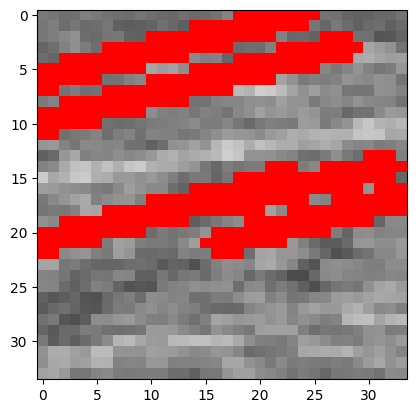

In [53]:
# show the filtered lines on a copy of the original image
aponeuroses_filtered = max_blur.copy().astype('uint8')
# Convert to 3 channels
aponeuroses_filtered = cv2.cvtColor(aponeuroses_filtered, cv2.COLOR_GRAY2BGR)
for line in filtered_lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(aponeuroses_filtered, (x1, y1), (x2, y2), (255, 0, 0), 2)

plt.imshow(aponeuroses_filtered, cmap='gray')
# plt.axis('off')

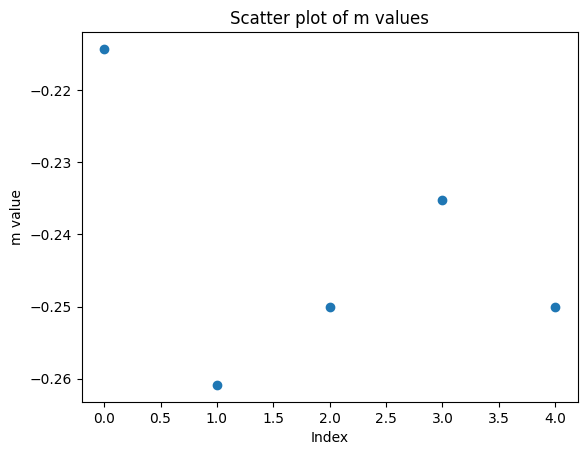

In [54]:
def calculate_slope_intercept(lines):
    m_values = []
    c_values = []
    for line in lines:
        for x1, y1, x2, y2 in line:
            if x2 - x1 != 0:  # Avoid division by zero
                m = (y2 - y1) / (x2 - x1)
                c = y1 - m * x1
                m_values.append(m)
                c_values.append(c)
            else:  # Vertical line, slope is infinite, so we skip or handle differently
                pass
    return m_values, c_values

def plot_c_values(c_values):
    # Assuming each c value is unique and plotting against a dummy X-axis
    plt.scatter(range(len(c_values)), c_values)
    plt.title('Scatter plot of m values')
    plt.xlabel('Index')
    plt.ylabel('m value')
    plt.show()

# Example usage
m_values, c_values = calculate_slope_intercept(filtered_lines)
plot_c_values(m_values)

In [55]:
intercept = np.median(c_values)
slope = np.median(m_values)
intercept, slope

(20.857142857142858, -0.25)

In [56]:
def slope_to_angle(slope):
    return math.atan(slope) * 180.0 / np.pi

new_slope = slope_to_angle(slope)
# Round to nearest int (up or down)
print(new_slope)
new_slope = int(new_slope - 0.5)
new_slope

-14.036243467926477


-14

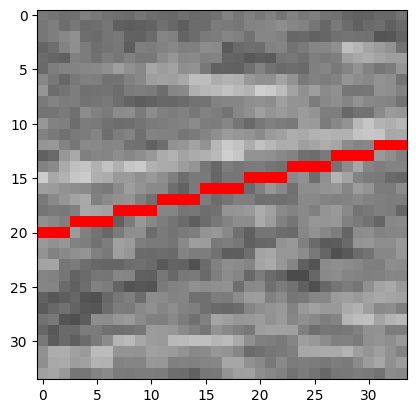

In [57]:
# Draw a line with the calculated slope and intercept on a copy of the original image
aponeuroses_line = max_blur.copy().astype('uint8')
# aponeuroses_line = aponeuroses_line.copy().astype('uint8')
# Convert to 3 channels
aponeuroses_line = cv2.cvtColor(aponeuroses_line, cv2.COLOR_GRAY2BGR)
width = aponeuroses_line.shape[1]

# Draw the line
x1 = 0
y1 = int(intercept)
x2 = width
y2 = int(slope * x2 + intercept)

# Draw two more lines to better visualize the aponeuroses
x3 = 0
y3 = int(intercept - 1)
x4 = width
y4 = int(slope * x4 + intercept - 1)

x5 = 0
y5 = int(intercept + 1)
x6 = width
y6 = int(slope * x6 + intercept + 1)

cv2.line(aponeuroses_line, (x1, y1), (x2, y2), (255, 0, 0), 1)

plt.imshow(aponeuroses_line, cmap='gray')
# plt.axis('off')

In [33]:
# Filter to get only lines that are above a certain line
def filter_lines_by_y(lines, y_min):
    filtered_lines = []
    for line in lines:
        for x1, y1, x2, y2 in line:
            if y1 < y_min and y2 < y_min:
                filtered_lines.append(line)
    return filtered_lines

In [34]:
filtered_lines = []

In [58]:
filtered_lines = filter_lines_by_y(lines, min(y1, y2))

In [36]:
len(lines), len(filtered_lines)

(23, 5)

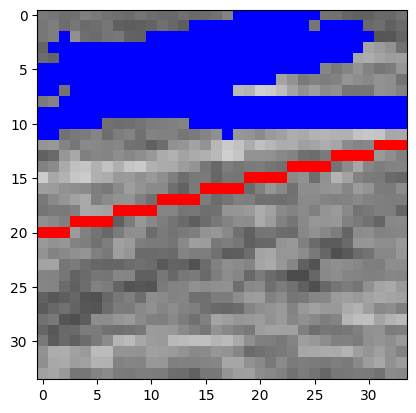

In [37]:
# show the filtered lines on a copy of the original image
aponeuroses_filtered = aponeuroses_line.copy().astype('uint8')
# Convert to 3 channels
for line in filtered_lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(aponeuroses_filtered, (x1, y1), (x2, y2), (0, 0, 255), 2)

plt.imshow(aponeuroses_filtered, cmap='gray')

In [69]:
filtered_lines = filter_lines_by_angle(filtered_lines, -5, -2)

In [70]:
len(lines), len(filtered_lines)

(23, 0)

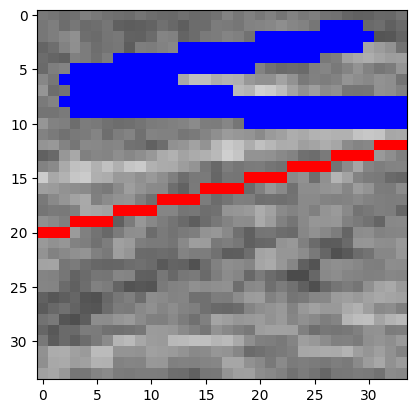

In [65]:
# show the filtered lines on a copy of the original image
aponeuroses_filtered = aponeuroses_line.copy().astype('uint8')
# Convert to 3 channels
for line in filtered_lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(aponeuroses_filtered, (x1, y1), (x2, y2), (0, 0, 255), 2)

plt.imshow(aponeuroses_filtered, cmap='gray')

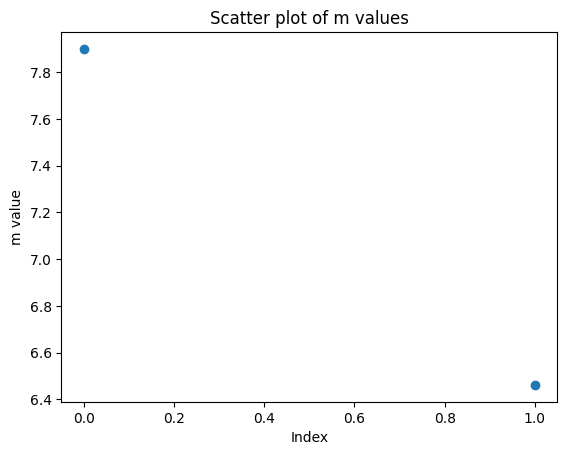

In [66]:
m_values, c_values = calculate_slope_intercept(filtered_lines)
plot_c_values(c_values)

In [67]:
intercept = np.median(c_values)
slope = np.median(m_values)
intercept, slope

(7.180769230769231, -0.060256410256410264)

In [68]:
new_slope = slope_to_angle(slope)
int(new_slope)

-3

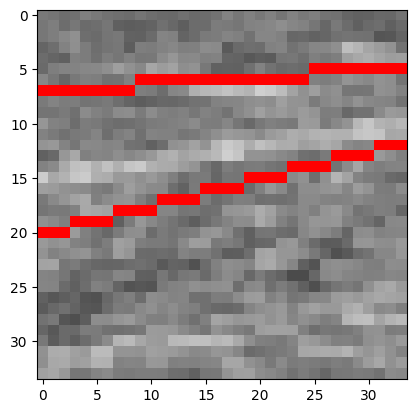

In [71]:
# Draw a line with the calculated slope and intercept on a copy of the original image
aponeuroses_line = aponeuroses_line.copy().astype('uint8')
width = aponeuroses_line.shape[1]

# Draw the line
x1 = 0
y1 = int(intercept)
x2 = width
y2 = int(slope * x2 + intercept)

# Draw two more lines to better visualize the aponeuroses
x3 = 0
y3 = int(intercept - 1)
x4 = width
y4 = int(slope * x4 + intercept - 1)

x5 = 0
y5 = int(intercept + 1)
x6 = width
y6 = int(slope * x6 + intercept + 1)

cv2.line(aponeuroses_line, (x1, y1), (x2, y2), (255, 0, 0), 1)

plt.imshow(aponeuroses_line, cmap='gray')